ASSIGNMENT
==============
Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

Import and store the data in a data frame. (2.5 points)
Remove the outliers from the data (5 points)
Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
Print the coefficients & intercepts of the linear regression model (5 points)
Print the accuracy of the overall model (2.5 points)
Github link: 

Please Note:

Total marks allotted for this assignment is 30.
Assignment final submission should be a URL to your Github repository.

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats 
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm 

import os
%matplotlib inline

Import and store the data in a data frame. (2.5 points) 

In [2]:
# making data frame 
    
airdata=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',header=None, sep='\s+', engine='python')
airdata.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [3]:
# add headers to columns
airdata.columns=['City1','City2','Average_Fare','Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_Fare1','Low_price_airline','market_share1','price']
airdata.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_Fare1,Low_price_airline,market_share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
airdata.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_Fare1,market_share1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [5]:
airdata.dtypes

City1                         object
City2                         object
Average_Fare                 float64
Distance                       int64
Average_weekly_passengers    float64
market_leading_airline        object
market_share                 float64
Average_Fare1                float64
Low_price_airline             object
market_share1                float64
price                        float64
dtype: object

Remove the outliers from the data (5 points) 

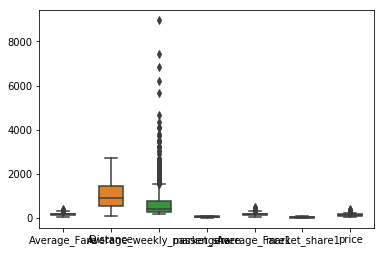

In [6]:
#Visualize data
sns.boxplot(data=airdata,orient='portrait',width=.5)

In [7]:
airdata.shape

(1000, 11)

Approach - as the outliers need to be found across multiple variables, I am using IQR method  

In [8]:
Q1 = airdata.quantile(0.25)
Q3 = airdata.quantile(0.75)
IQR = Q3 - Q1
airdata_q1 = (Q1 - 1.5 * IQR)
airdata_q2 = (Q1 + 1.5 * IQR)
print(IQR)

Average_Fare                  71.4175
Distance                     899.0000
Average_weekly_passengers    512.7150
market_share                  27.0000
Average_Fare1                 78.8925
market_share1                 39.7775
price                         54.7625
dtype: float64


In [9]:
airdata_remove=(airdata < (airdata_q1)) |(airdata > (airdata_q2))
print(airdata_remove).head(10)

     Average_Fare  Average_Fare1  Average_weekly_passengers  City1  City2  \
0           False          False                      False  False  False   
1           False          False                      False  False  False   
2           False          False                      False  False  False   
3           False          False                      False  False  False   
4           False          False                      False  False  False   
5           False          False                      False  False  False   
6           False          False                      False  False  False   
7           False          False                      False  False  False   
8           False          False                      False  False  False   
9           False          False                      False  False  False   
10          False          False                      False  False  False   
11          False          False                      False  False  False   

AttributeError: 'NoneType' object has no attribute 'head'

In [10]:
airdata_remove = airdata[~((airdata< (Q1 - 1.5 * IQR))|(airdata>(Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
airdata.shape,airdata_remove.shape

((1000, 11), (885, 11))

In [25]:
airdata_remove.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_Fare1,Low_price_airline,market_share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [12]:
#Dependent Variable
y=['Average_Fare']
#InDependent Variable
x=['City1','City2','Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_Fare1','Low_price_airline','market_share1','price']
print(x),print(y)

['City1', 'City2', 'Distance', 'Average_weekly_passengers', 'market_leading_airline', 'market_share', 'Average_Fare1', 'Low_price_airline', 'market_share1', 'price']
['Average_Fare']


(None, None)

Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [13]:
airdata_corr=airdata_remove.corr()
airdata_corr

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_Fare1,market_share1,price
Average_Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average_weekly_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average_Fare1,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market_share1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


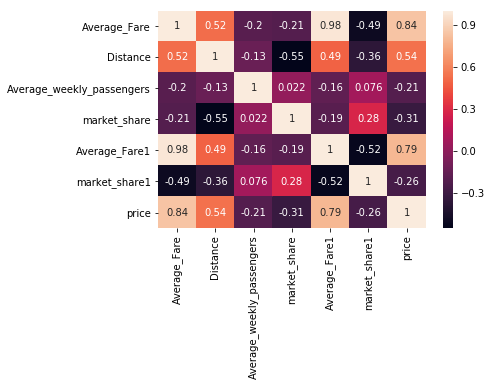

In [14]:
sns.heatmap(airdata_corr, annot=True)

In [15]:
m = ~(airdata_corr.mask(np.eye(len(airdata_corr), dtype=bool)).abs()<0.1).any()
mm = airdata_corr.loc[m, m]

In [16]:
mm

,Average_Fare,Distance,Average_Fare1,price
Average_Fare,1.000000,0.522650,0.979713,0.840993
Distance,0.522650,1.000000,0.489721,0.539894
Average_Fare1,0.979713,0.489721,1.000000,0.794157
price,0.840993,0.539894,0.794157,1.000000


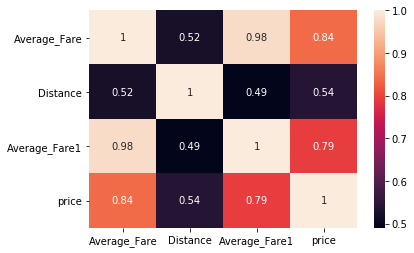

In [17]:
sns.heatmap(mm, annot=True)

Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

C:\Users\370504\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


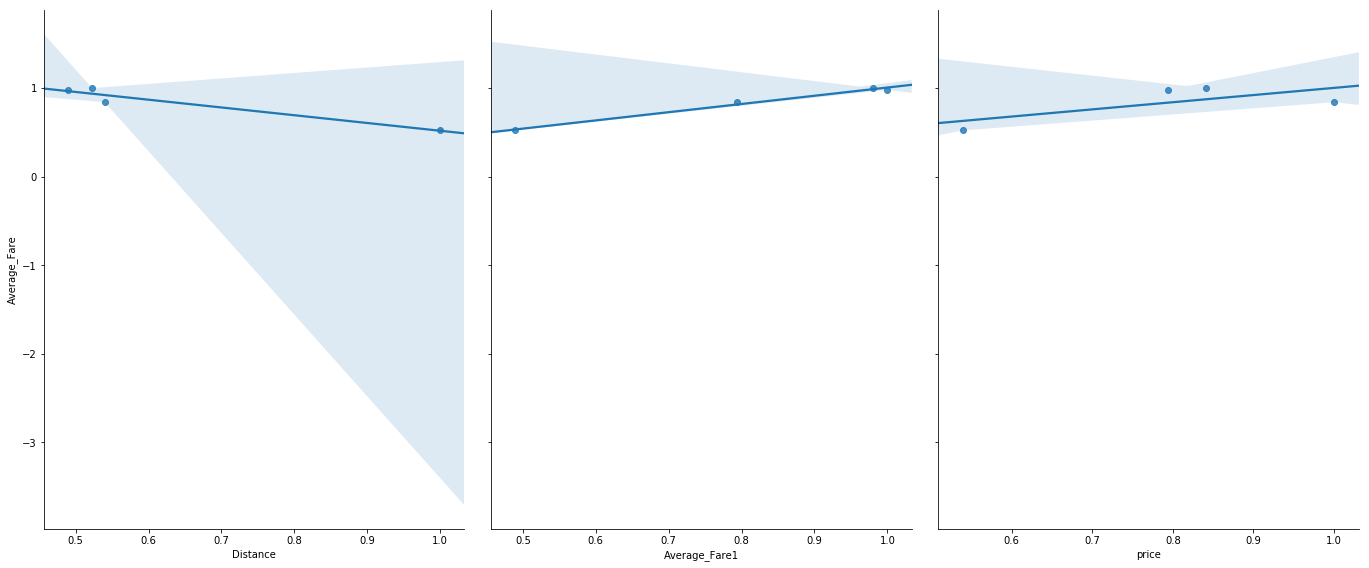

In [18]:
sns.pairplot(mm,x_vars=[ 'Distance', 'Average_Fare1', 'price'],y_vars=['Average_Fare'],kind='reg',size=8,aspect=0.8)


Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points) 

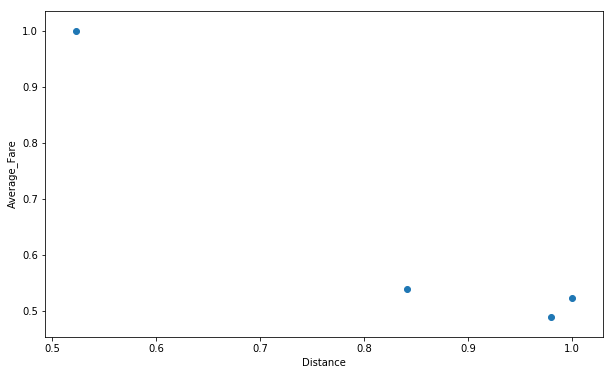

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mm['Average_Fare'], mm['Distance'])
ax.set_xlabel('Distance')
ax.set_ylabel('Average_Fare')
plt.show()

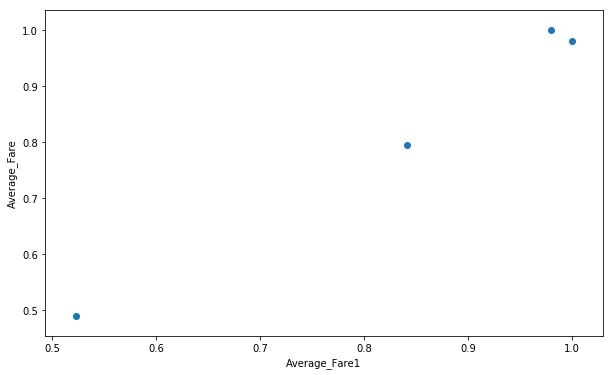

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mm['Average_Fare'], mm['Average_Fare1'])
ax.set_xlabel('Average_Fare1')
ax.set_ylabel('Average_Fare')
plt.show()

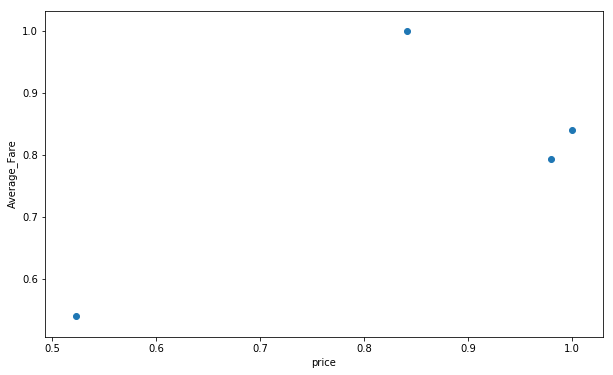

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mm['Average_Fare'], mm['price'])
ax.set_xlabel('price')
ax.set_ylabel('Average_Fare')
plt.show()

Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points) 

In [32]:
mm.head()

,Average_Fare,Distance,Average_Fare1,price
Average_Fare,1.000000,0.522650,0.979713,0.840993
Distance,0.522650,1.000000,0.489721,0.539894
Average_Fare1,0.979713,0.489721,1.000000,0.794157
price,0.840993,0.539894,0.794157,1.000000


In [33]:
airdata_remove1.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_Fare1,market_share1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [34]:
data3=mm.values # convert the data frame to a numpy array
print(type(data3))
print(data3)

<class 'numpy.ndarray'>
[[1.         0.52265001 0.97971308 0.84099333]
 [0.52265001 1.         0.48972079 0.53989424]
 [0.97971308 0.48972079 1.         0.79415744]
 [0.84099333 0.53989424 0.79415744 1.        ]]


In [35]:
print(data3.shape)
data3=data3[:,1:]
print(data3.shape)

(4, 4)
(4, 3)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


ValueError: Found input variables with inconsistent numbers of samples: [10, 1]

Print the coefficients & intercepts of the linear regression model (5 points) 

Print the accuracy of the overall model (2.5 points)

Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)